# Newton's method for finding roots

Suppose we want to solve the equation 
$$\cos(x) = x^3$$
for the variable $x$.  This is equivalent to finding the root or zero of $h(x) = \cos(x) - x^3$.

In general the function $h(x)$ might be expensive to evaluate, so plotting it and looking for the zero is not feasible.  For this demonstration, though, we can make a graph of the function over some finite domain.  The cell below defines the equation as a symbolic expression and generates the plot.  We observe that the desired solution is in the $[0.5,1]$ interval.

-x**3 + cos(x)


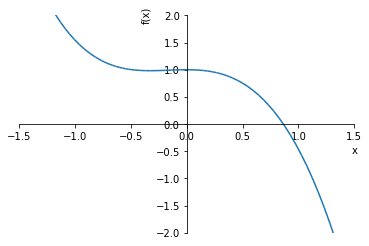

In [1]:
import sympy as sp

x = sp.symbols('x');
h = sp.cos(x) - x**3;
print(h);
sp.plot(h, (x,-1.5,1.5), ylim=(-2,2));

One might hope to just find the solution using a symbolic solver.  However, when I uncomment the code below and run it an error is thrown saying there is no algorithm implemented to solve an equation of this type.  

In [53]:
#sp.solve(h, x);  

Only certain cagegories of functions can be handled by the solver.  Our $h$, with polynomial and trigonometric parts, doesn't have the required structure.  

The function $h(x)$ is infinitely differentiable and analytic and can be locally approximated around $x_0$ by a Taylor series expansion:
$$h(x) = h(x_0)+\frac {h'(x_0)}{1!} (x-x_0)+ \frac{h''(x_0)}{2!} (x-x_0)^2+\frac{h^{(3)}(x_0)}{3!}(x-x_0)^3+ \cdots.$$
This is a polynomial in $x$ and is quite tractible to deal with.  In particular, we know how to quite easily find the zeros of low order polynomials.

This suggests an iterative strategy for finding the zero of $h(x)$.  Start with a guess or initial estimate $x_0$.  Locally approximate $h(x)$ around this point using a low-order Taylor expansion, and find the zero for this approximation.  We know that the expansion is accurate for values of $x$ near $x_0$, so if the zero is very close to $x_0$ then it's a good solution and we can terminate.  Otherwise we hope that the zero of our approximation is close to the actual zero, move $x_0$ to this new location, and repeat the process.  This is the essence of Newton's method https://en.wikipedia.org/wiki/Newton's_method.

If a first-order Taylor approximation is used then given a center $x_0$ we have
$$h(x) \approx h(x_0) + h'(x_0)(x-x_0)$$
The right-hand side of this approximation is implemented symbolically in the cell below for the given $h$.

In [55]:
hp = sp.diff(h, x);
x0 = sp.symbols('x0');
h1 = h.subs(x,x0) + hp.subs({x:x0})*(x-x0);  # first-order Taylor at x0
print(h1);

-x0**3 + (x - x0)*(-3*x0**2 - sin(x0)) + cos(x0)


In the code below we plot the function and its first-order Taylor expansion for the case of $x_0=0.5$.

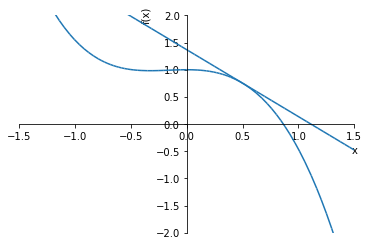

-1.2294255386042*x + 1.36729533119247


In [56]:
x0c = 0.5;  # current x0 value
h1s = h1.subs(x0,x0c);
sp.plot(h, h1s, (x,-1.5,1.5), ylim=(-2,2));
print(h1s)

A linear equation is a special case of a polynomial, and the `roots` function knows how to find zeros of these.  There is only a single zero, which is found below.

In [58]:
zs = sp.roots(h1s);
x0n = list(zs.keys())[0];
x0n

1.11214163709727

This could also just have been calculated numerically directly from the Taylor approximation:  if at $x=x_0$ we know the function value $h(x_0) = a$ and the derivative $h'(x_0) = b$ then
$$h(x) \approx h(x_0) + h'(x_0)(x-x_0) = a + b(x-x_0),$$
which has a zero at
$$x =-a/b + x_0 = -\frac{h(x_0)}{h'(x_0)} + x_0.$$

In [61]:
lam_h = sp.lambdify(x, h, modules=['numpy']);
lam_hp = sp.lambdify(x, hp, modules=['numpy']);
x0nn = -lam_h(x0c)/lam_hp(x0c) + x0c;
x0nn

1.1121416370972725

Thus we see that in order to perform the update step all we need is a method of evaluating $h(x)$ and $h'(x)$ for some given $x_0$.  The lambda functions above obtained from the symbolic expression provide this utility, but if the expressions are known then could also just be coded directly.

The code below shows a sequence of plots demonstrating Newton's method for finding the root of $h(x)$ given an initial estimate of $x_0 = 0.5$.

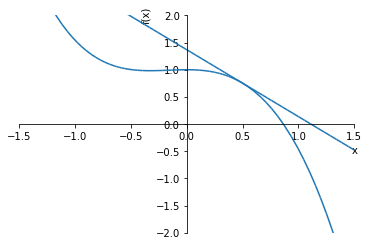

Crossing: x=1.112142


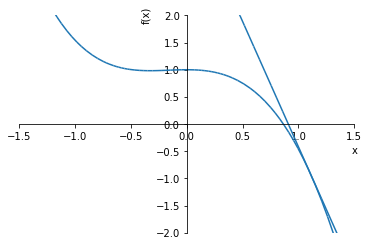

Crossing: x=0.909673


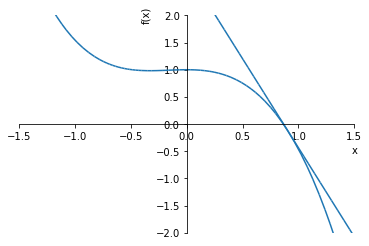

Crossing: x=0.867264


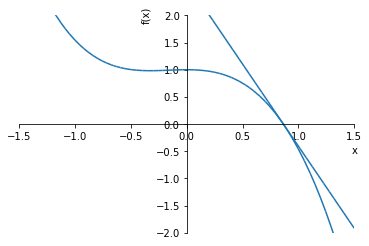

Crossing: x=0.865477


In [36]:
x0c = 0.5;  # initial
for iter in range(0,4):
    h1s = h1.subs(x0,x0c)
    sp.plot(h, h1s, (x,-1.5,1.5), ylim=(-2,2));
    zs = sp.roots(h1s);
    x0c = list(zs.keys())[0];
    print('Crossing: x=%f' % x0c);

# Tasks

These tasks involve writing code, or modifying existing code, to meet the objectives described.

1.  Write code to recursively find the solution to $\cos(x) = x^3$ using Newton's method.  Iterate the procedure described until the change in the estimate of the zero location is small enough.<br><br>

2.  The method described uses a very rough first-order approximation to the function, and a large number of low-complexity iterations will need to be done to find the root.  You could imagine that it might be better to use a higher-order approximation, and do a smaller number of higher-complexity iterations.  Generate a single plot of the function $h(x)$ and of the second-order Taylor approximation with center point $x_0 = 0.5$, and find the roots for the approximation.<br>
<br>
Developing a numerical method around this approach is not trivial, though, mainly because the quadratic approximation to the function could have two roots (which one do you choose?) or zero roots (what do you do then?).<br><br>

3.  Use Newton's method to find the value of $\sqrt{13}$.  You should have confidence in your solution to 5 decimal places.